# Logistic Regression

In [1]:
import numpy as np
import pandas as pd

### importing training and test set

In [2]:
datasets = [pd.read_csv(f'logistic_regression-dataset/trainData{i}.csv', header=None) for i in range(1, 6)]

X_test = pd.read_csv('logistic_regression-dataset/testData.csv', header=None)
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,1,13,10,0,0,0,8,...,16,0,0,0,4,0,14,0,15,0
1,0,0,0,0,0,7,0,0,0,0,...,16,0,0,0,0,0,2,11,12,0
2,16,11,5,16,15,16,16,16,16,16,...,14,16,16,16,16,16,16,16,16,0
3,0,0,7,16,2,2,0,0,0,1,...,11,0,0,0,0,9,9,0,0,0
4,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,13,14,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,0
106,0,0,0,8,2,12,0,0,7,0,...,6,0,0,0,5,10,6,5,0,0
107,16,14,16,16,16,16,7,16,0,16,...,6,10,16,9,16,16,16,10,9,16
108,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = [pd.read_csv(f'logistic_regression-dataset/trainLabels{i}.csv', header=None) for i in range(1, 6)]
testLabels = pd.read_csv('logistic_regression-dataset/testLabels.csv', header=None)

#### Data transformation
- Combine features and labels. 
- Convert label classes to 0 and 1 

In [4]:
X_train = pd.concat(datasets, axis=0)
y_train = pd.concat(labels, axis=0)

y_train = y_train[0].values
y_train = np.where(y_train == 5, 0, 1)

y_test = testLabels[0].values
y_test = np.where(y_test == 5, 0, 1)

y_train

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

#### Logistic Regression class

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100, lambda_regularizer = 0.0) -> None:
        self.w = None
        self.w0 = None
        self.errors = []
        self.losses = []
        self.test_errors = []
        self.test_losses = []
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = 1e-8
        self.lambda_regularizer = lambda_regularizer
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    def train(self, X, y, X_test, y_test):
        m, n = X.shape
        self.w = np.zeros(n) 
        self.w0 = 0 

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.w) + self.w0
            y_pred = self.sigmoid(linear_model)
            y_pred = np.clip(y_pred, self.epsilon, 1 - self.epsilon)
            
            # gradient descent
            d_weights = (1/m) * np.dot(X.T, (y_pred - y)) + self.lambda_regularizer * self.w
            d_bias = (1/m) * np.sum(y_pred - y)
            
            # update the weights and bias.
            self.w -= self.learning_rate * d_weights
            self.w0 -= self.learning_rate * d_bias
            
            # Computes the loss using binary cross entropyy
            loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            regularized_loss = 0.5 * self.lambda_regularizer * np.sum(self.w ** 2)
            total_loss = loss + regularized_loss
            self.losses.append(total_loss)
            
            predictions = np.where(y_pred >= 0.5, 1, 0)
            error = np.mean(predictions != y)
            self.errors.append(error)
            
            # evaluating on the test set
            test_error, test_loss, prediction = self.predict(X_test, y_test)
            self.test_errors.append(test_error)
            self.test_losses.append(test_loss)

            # Convergence criteria to check if the change in loss is very small, if so we can stop early
            if epoch > 0 and abs(self.losses[epoch] - self.losses[epoch-1]) < 1e-5:
                break
            
        return self.errors, self.losses, predictions, self.test_errors, self.test_losses, prediction
        
    def predict(self, X_test, y_test):
        linear_model = np.dot(X_test, self.w) + self.w0
        y_pred = self.sigmoid(linear_model)
        
        y_pred = np.clip(y_pred, self.epsilon, 1 - self.epsilon)
        
        predictions = np.where(y_pred >= 0.5, 1, 0)

        # test set loss
        m = len(y_test)
        test_loss = -(1/m) * np.sum(y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred))
            
        # test set error
        test_error = np.mean(predictions != y_test)

        return test_error, test_loss, predictions
    
    def getParameters(self):
        return self.w, self.w0
    
    def accuracy_score(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        accuracy = correct_predictions / len(y_true) * 100
    
        return round(accuracy, 2)

### Logistic Regression (without regularization)

In [6]:
classifier = LogisticRegression(learning_rate=0.01, epochs=100)

training_errors, training_losses, training_predictions, test_error, test_loss, predictions = classifier.train(X_train, y_train, X_test, y_test)
w, w0 = classifier.getParameters()

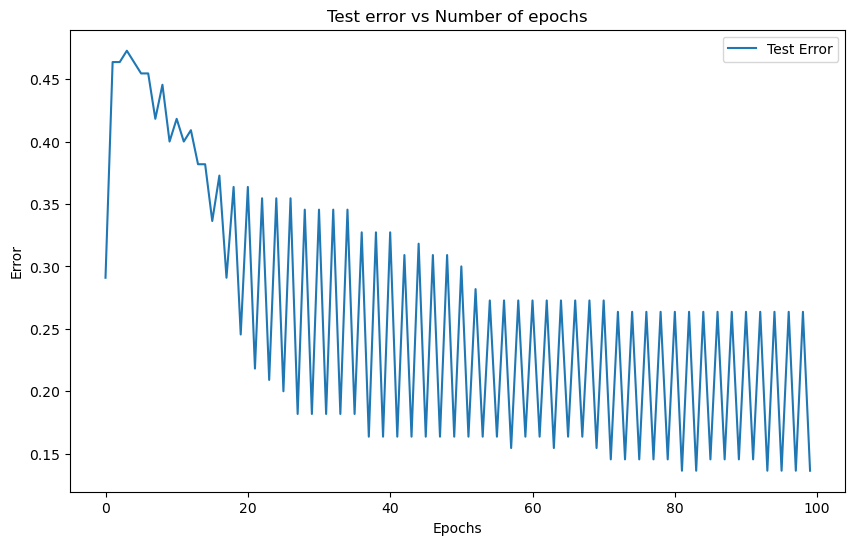

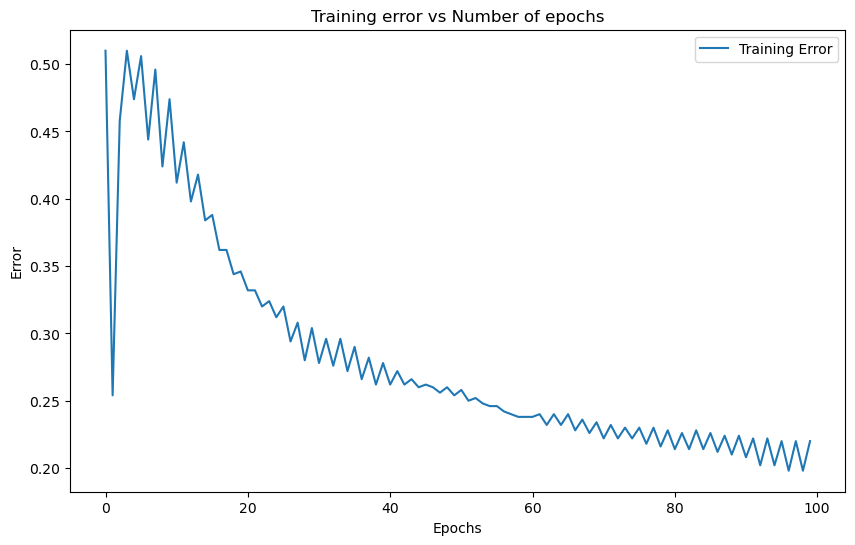

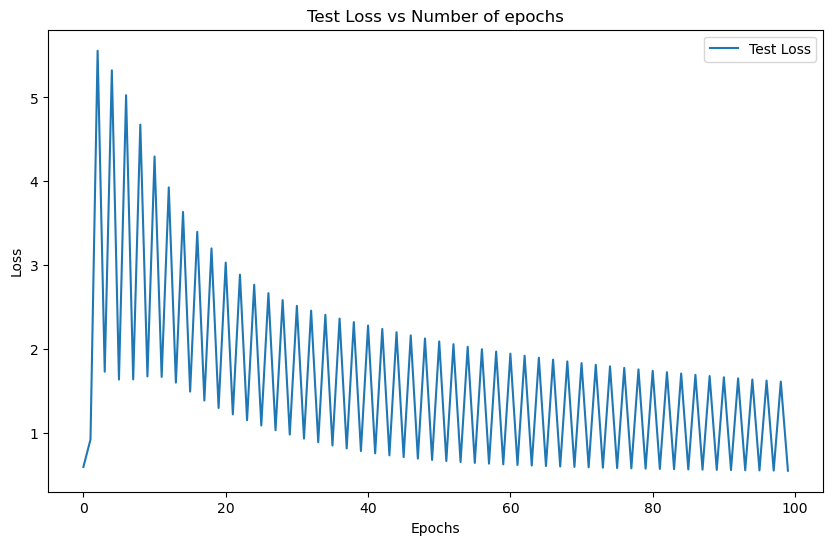

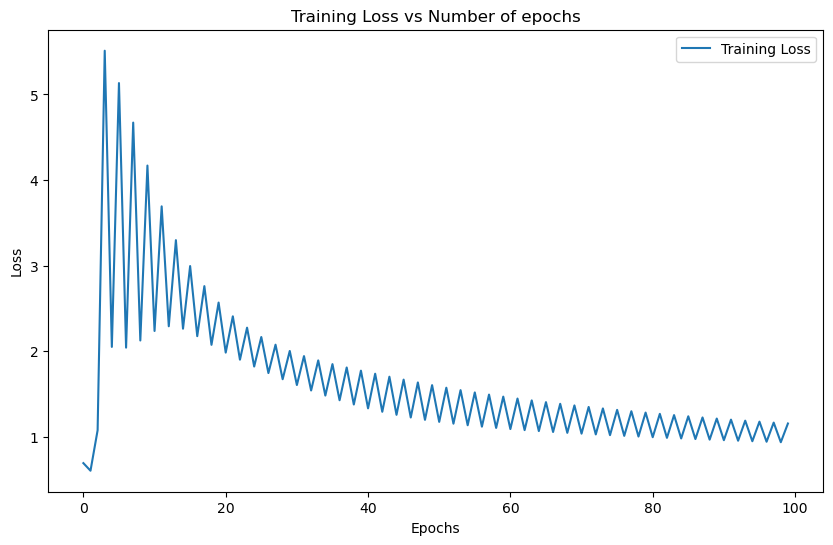

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_error)), test_error, label="Test Error")
plt.title("Test error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_errors)), training_errors, label="Training Error")
plt.title("Training error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_loss)), test_loss, label="Test Loss")
plt.title("Test Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_losses)), training_losses, label="Training Loss")
plt.title("Training Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [8]:
print("weights: \n", w)
print("bias ", w0)

weights: 
 [ 0.01012011  0.0486729  -0.11410373 -0.0992825  -0.11945543 -0.30849027
 -0.11431152 -0.00528568 -0.11787942 -0.08329556 -0.11308301 -0.02213705
 -0.11342687 -0.2798619  -0.03674415  0.08527915 -0.04525624 -0.10597239
 -0.05616664  0.03467865 -0.08762106  0.07056468  0.08873955  0.06082666
 -0.07840356 -0.13455726  0.02118383 -0.08902713 -0.12062248 -0.01693393
  0.09264187 -0.02635205 -0.03894845  0.06788016  0.15102895  0.0397117
 -0.03674107  0.03214188  0.01234414  0.0605229   0.03458726  0.00432942
  0.38110274  0.1899669   0.01884807 -0.00114262  0.08374763 -0.03293536
 -0.01503702  0.05985373  0.07749289  0.0718829  -0.11781593  0.06186662
  0.20069879  0.00954114  0.04628334  0.05516987 -0.24502073 -0.07546009
  0.02176426  0.12467944  0.06559734  0.04050298]
bias  -0.008961533180870767


# Logistic Regression (with regularization.  λ = 0.5)

In [9]:
classifier = LogisticRegression(learning_rate=0.01, epochs=100, lambda_regularizer=0.5)

training_errors, training_losses, training_predictions, test_error, test_loss, predictions = classifier.train(X_train, y_train, X_test, y_test)
w, w0 = classifier.getParameters()

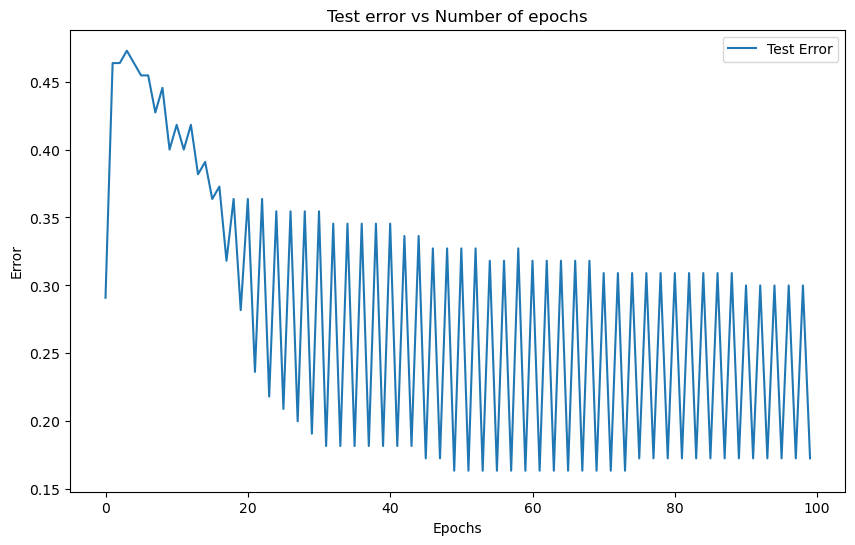

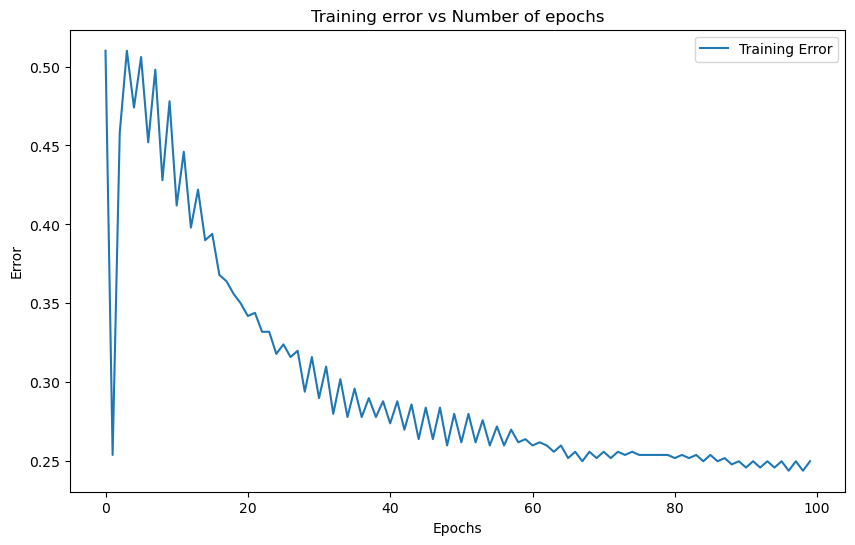

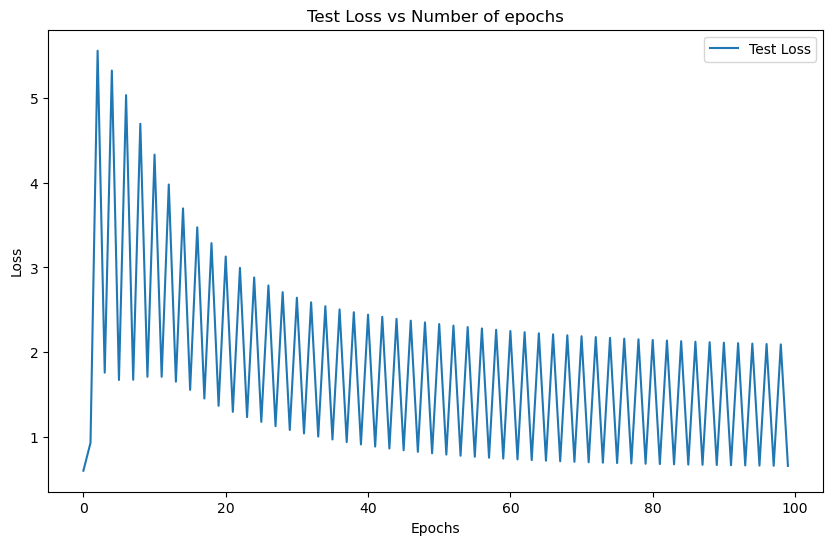

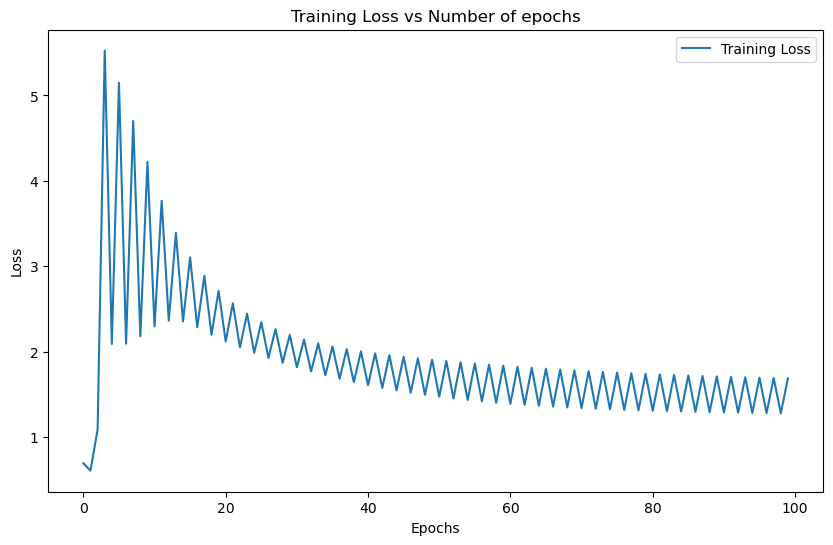

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_error)), test_error, label="Test Error")
plt.title("Test error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_errors)), training_errors, label="Training Error")
plt.title("Training error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_loss)), test_loss, label="Test Loss")
plt.title("Test Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_losses)), training_losses, label="Training Loss")
plt.title("Training Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [11]:
print("weights: \n", w)
print("bias: ", w0)

weights: 
 [ 0.00973444  0.03524323 -0.10163911 -0.09042074 -0.11373701 -0.272823
 -0.09881601 -0.00712359 -0.09650973 -0.08074943 -0.10675081 -0.02772126
 -0.10734187 -0.24544285 -0.03223023  0.07198074 -0.03878013 -0.09362317
 -0.05546194  0.02700163 -0.07486395  0.06340346  0.07533507  0.05074586
 -0.062364   -0.12018568  0.00849134 -0.08143777 -0.10618096 -0.02414595
  0.07463779 -0.02434075 -0.02520318  0.0581899   0.12619391  0.03505186
 -0.02845488  0.02887245  0.01447538  0.05155116  0.0316363   0.01058274
  0.32895895  0.16328732  0.00955791 -0.00631103  0.07922466 -0.02048357
 -0.00379784  0.04732834  0.06080482  0.05559412 -0.10455707  0.05157021
  0.17453505  0.01002044  0.03901424  0.04253227 -0.21900903 -0.07450398
  0.01507543  0.10759538  0.05713763  0.03155902]
bias:  -0.010313008072484685


# Logistic Regression (with regularization. λ = 1)

In [12]:
classifier = LogisticRegression(learning_rate=0.01, epochs=100, lambda_regularizer=1.0)

training_errors, training_losses, training_predictions, test_error, test_loss, predictions = classifier.train(X_train, y_train, X_test, y_test)
w, w0 = classifier.getParameters()

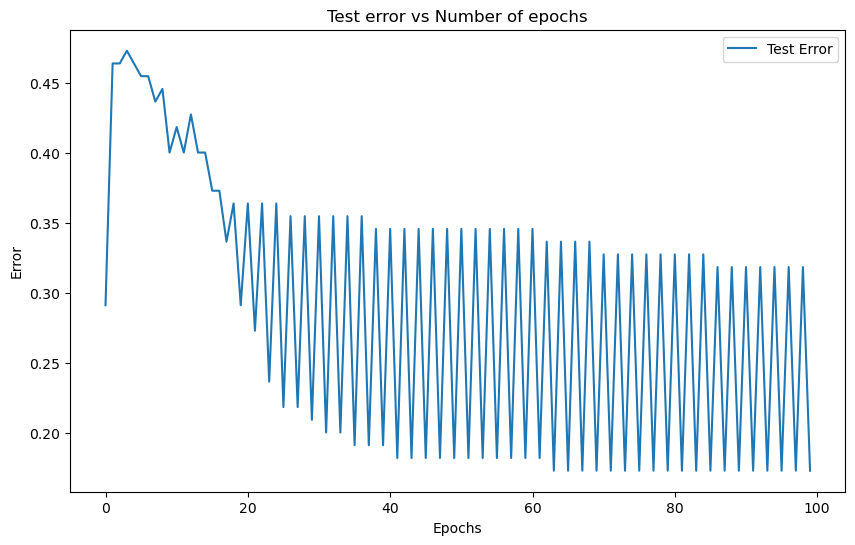

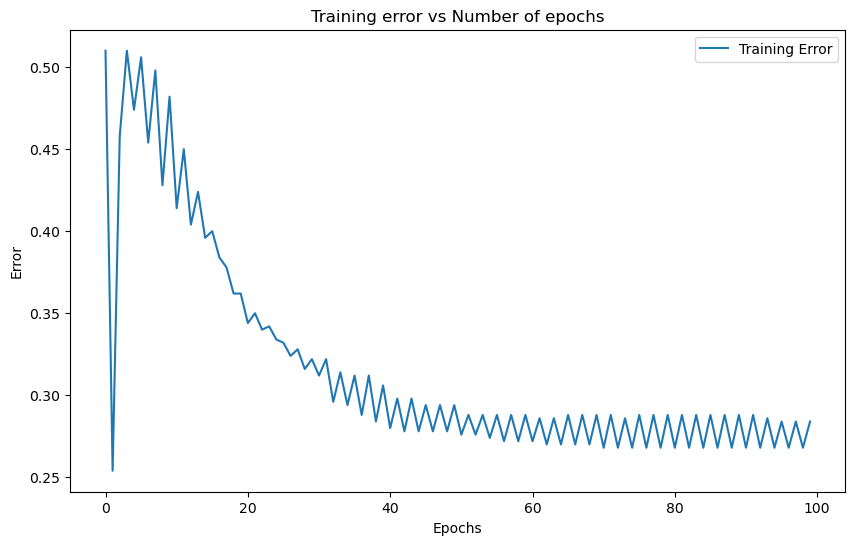

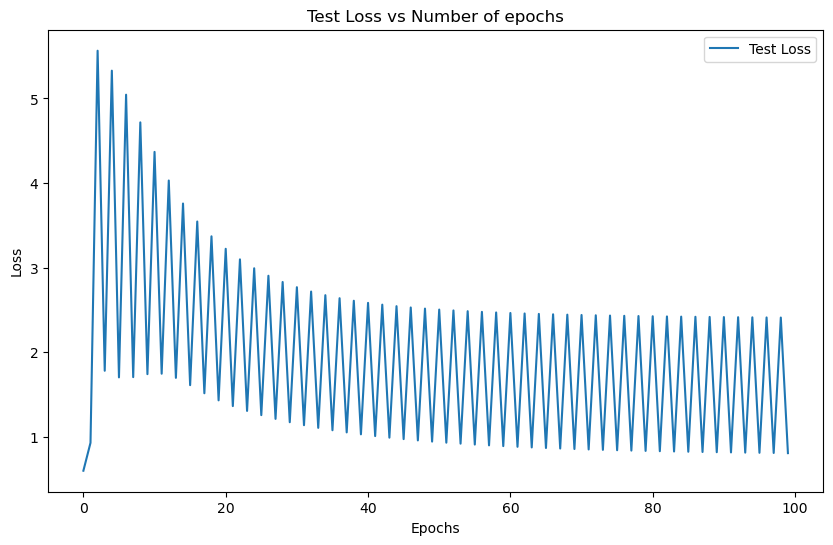

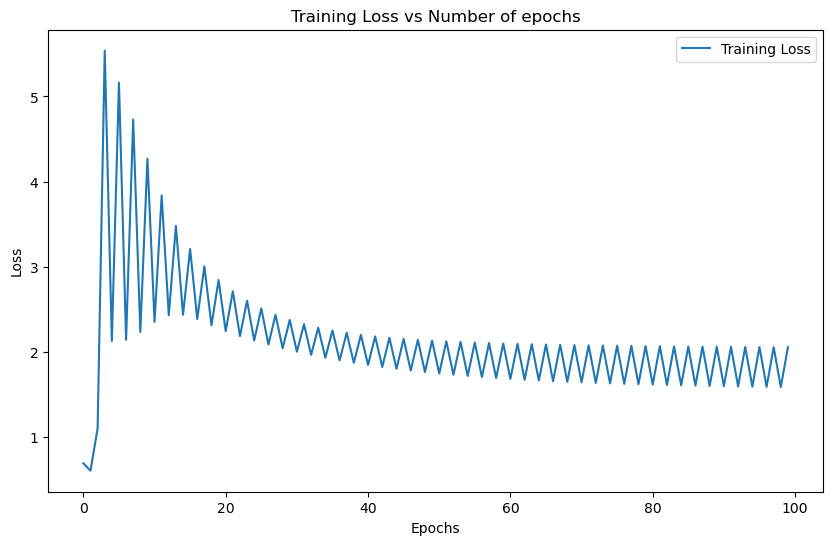

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_error)), test_error, label="Test Error")
plt.title("Test error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_errors)), training_errors, label="Training Error")
plt.title("Training error vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(test_loss)), test_loss, label="Test Loss")
plt.title("Test Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(training_losses)), training_losses, label="Training Loss")
plt.title("Training Loss vs Number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
print("weights: \n", w)
print("bias: ", w0)

weights: 
 [ 0.00935028  0.02502067 -0.09575373 -0.08283823 -0.11203329 -0.24650351
 -0.08814149 -0.00848731 -0.082576   -0.08218306 -0.10504366 -0.03123893
 -0.10103599 -0.21885621 -0.02945872  0.05752287 -0.03708713 -0.08577577
 -0.05359128  0.02230907 -0.06956168  0.05182264  0.06168539  0.04239053
 -0.04961188 -0.10695958  0.00094715 -0.07895651 -0.09636999 -0.03079145
  0.0586045  -0.02289302 -0.01477722  0.04893424  0.11309418  0.02909307
 -0.02156436  0.02535864  0.01472824  0.0425415   0.0291932   0.01667889
  0.28949911  0.14417915  0.002689   -0.01014663  0.07552765 -0.01464309
  0.00516319  0.0395192   0.05267661  0.04609513 -0.09738416  0.04760174
  0.15896156  0.00946683  0.02777158  0.03173807 -0.19877001 -0.07240988
  0.01295113  0.10012591  0.05232677  0.02483341]
bias:  -0.011430031043617925


# 5-Fold Cross Validation

Best λ: 0.1
Average cross-validation error for best λ: 0.22799999999999998


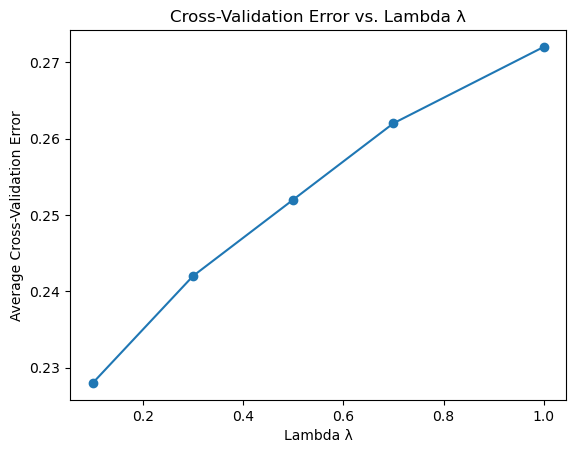

In [15]:
k = 5
lambda_values = [0.1, 0.3, 0.5, 0.7, 1]
fold_size = len(y_train) // k

lambda_errors = []

for lambda_val in lambda_values:
    fold_errors = []
    
    for fold in range(k):
        # validation set for the current fold
        val_start = fold * fold_size
        val_end = val_start + fold_size
        
        fold_x_train = np.concatenate([X_train[:val_start], X_train[val_end:]])
        fold_y_train = np.concatenate([y_train[:val_start], y_train[val_end:]])
        x_val = X_train[val_start:val_end]
        y_val = y_train[val_start:val_end]
        
        model = LogisticRegression(learning_rate=0.01, epochs=100, lambda_regularizer=lambda_val)
        
        # training model on training set and validate on the fold validation set
        _, _, _, test_errors, _, _ = model.train(fold_x_train, fold_y_train, x_val, y_val)
        
        # store the test error from the final epoch
        fold_errors.append(test_errors[-1])
    
    # Average error for this lambda value
    avg_error = np.mean(fold_errors)
    lambda_errors.append(avg_error)

best_lambda_index = np.argmin(lambda_errors)
best_lambda = lambda_values[best_lambda_index]

print(f"Best λ: {best_lambda}")
print(f"Average cross-validation error for best λ: {lambda_errors[best_lambda_index]}")


plt.plot(lambda_values, lambda_errors, marker='o')
plt.xlabel('Lambda λ')
plt.ylabel('Average Cross-Validation Error')
plt.title('Cross-Validation Error vs. Lambda λ')
plt.show()
